

# Project: Investigate a Dataset (Titanic Disaster)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

<a id='gathering'></a>
## Data Gathering

In [1]:
# import library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [2]:
# extract compressed file
with ZipFile('titanic.zip','r') as z:
    z.extractall()

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# load CSV file into Dataframe and take a overview 
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# assesing Data and do observation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- column 'Cabin' is unnesscary in our epxloratary
- There are null value in 'Age', 'Cabin' and 'Embarked'

### Data Cleaning (Replace this with more specific notes!)

##### - column 'Cabin' is unnesscary in our epxloratary

In [6]:
# drop Cabin column 
df.drop('Cabin',axis=1, inplace=True)

##### - There are null value in 'Age' and 'Embarked' drop null value and replace age with mean of ages

In [7]:
# first, fill the missing value in Age column with average of ages
df.Age.fillna(df['Age'].mean(), inplace=True)

In [8]:
# then drop null value
df.dropna(inplace=True)

In [9]:
# check every null value in un nesscary column are droped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [10]:
# check of any duplicated value
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Number of Survived and Died)

In [11]:
# count Survived and not survived person (0 = not survived, 1 = Survived)
df.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [12]:
# calculate % of Survived and not survived
Total = df.Survived.count()
Died = df.Survived.value_counts()[0]
Survived = df.Survived.value_counts()[1]
print('% of Survived Passenger is : {}'.format((Survived/Total)*100))
print('% of not survived Passenger is : {}'.format((Died/Total)*100))

% of Survived Passenger is : 38.24521934758155
% of not survived Passenger is : 61.754780652418454


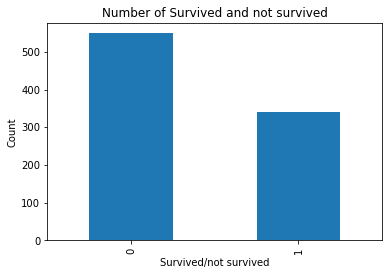

In [13]:
# visualize Number of Survived and not survived
df.Survived.value_counts().plot(kind='bar', title='Number of Survived and not survived', xlabel='Survived/not survived', ylabel='Count');

- Number of Survived = (340) ==> 38.2%
- Number of not Survived = (549)     ==> 61.7%

### Research Question 2  (Number of Survived according to Gender)

In [14]:
# group Survived by Sex
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           231
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [15]:
# calculate % of Survived and not survived for each gender (male / female)

# calculate % of Survived and not survived for female
print('% Survived passenger from all female is {}'.
format((df.groupby('Sex')['Survived'].value_counts()[0] / (df.groupby('Sex')['Survived'].count()[0]))*100))
print('% not survived passenger from all female is {}\n'.
format((df.groupby('Sex')['Survived'].value_counts()[1] / (df.groupby('Sex')['Survived'].count()[0]))*100))

# calculate % of Survived and not survived for male
print('% Survived passenger from all male is {}'.
format((df.groupby('Sex')['Survived'].value_counts()[3] / (df.groupby('Sex')['Survived'].count()[1]))*100))
print('% not survived passenger from all male is {}'.
format((df.groupby('Sex')['Survived'].value_counts()[2] / (df.groupby('Sex')['Survived'].count()[1]))*100))

% Survived passenger from all female is 74.03846153846155
% not survived passenger from all female is 25.961538461538463

% Survived passenger from all male is 18.890814558058924
% not survived passenger from all male is 81.10918544194108


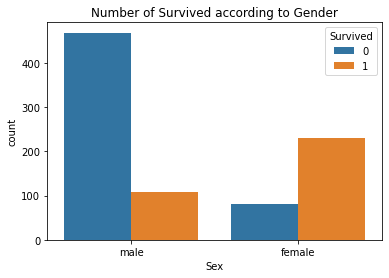

In [16]:
# visualize Number of Survived and not survived according to gender
ax = sns.countplot(x ='Sex', hue = "Survived", data = df)
ax.set_title('Number of Survived according to Gender'); 


- The most Survived passenger from female is 231 with 74.03% of all women
- The most not survived Passenger from male is 468 with 81.10% of all men

### Research Question 3  (Number of Survived according to Ticket class)

In [17]:
# group Survived by Ticket class
df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           134
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

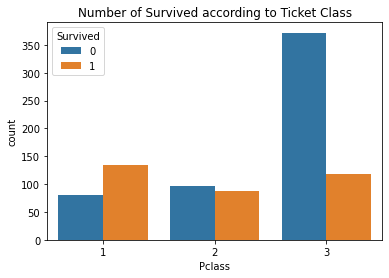

In [18]:
# visualize Number of Survived and not survived according to Ticket class
ax = sns.countplot(x ='Pclass', hue = "Survived", data = df)
ax.set_title('Number of Survived according to Ticket Class'); 


- The most Survived Passengers who have 1st class tickets then 3rd class tickets and finally 2nd class tickets

<a id='conclusions'></a>
## Conclusions



Total Passenger is 889
- Number of female is 312 and male is 577
- Number of Survived = (340) with 38.2% and Number of Died = (549) with 61.7%
- Female is the most survived passanger 231 
- Male is the most not survived passanger 468
- The most Survived Passengers who have 1st class tickets then 3rd class tickets and finally 2nd class tickets